In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# $SNR = \frac{Peak_{sig}}{RMS_{chunk}}$

In [3]:
def GetSNR(Trace):
    from scipy.signal import hilbert
    
    SigPeak = np.max(np.abs(Trace)) # Can also use abs value instead of hilbert ## Peak in the entire trace, 
    Chunks = np.array_split(Trace, 16)  # Split the trace in to 10 small chunks
    ChunkRMS_squared = [(sum(chunk**2))/len(chunk) for chunk in Chunks] ## RMS^2 of each chunk
    RMS_Median = np.median(ChunkRMS_squared) ## Chunk with signal in it.
    return SigPeak**2/RMS_Median 

Loading Data
Calculating SNR
Saving data and Plot
Loading Data
Calculating SNR
Saving data and Plot
Loading Data
Calculating SNR
Saving data and Plot


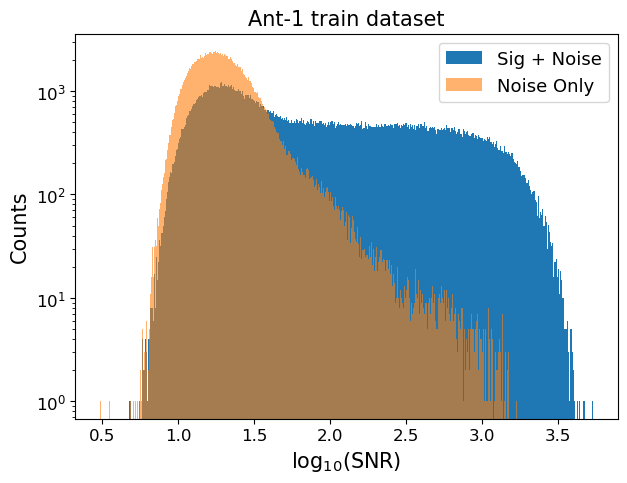

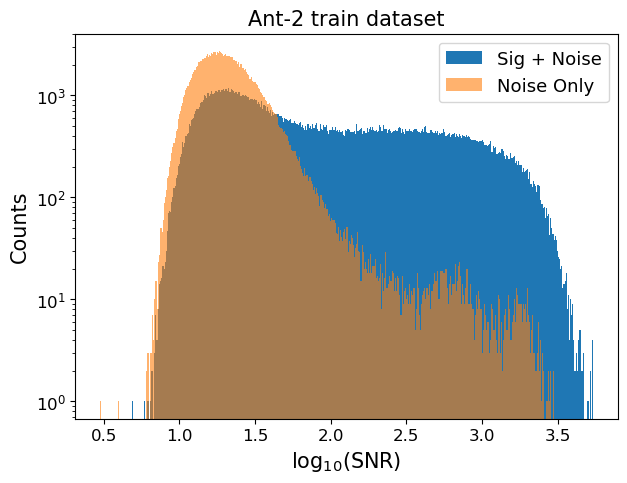

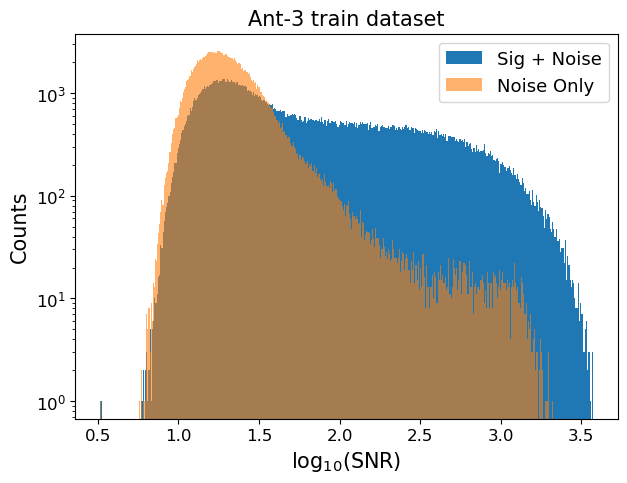

In [8]:
for ant in [1, 2, 3]:
    data = "train"
    month = "JanFeb"

#     DataDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/{month}/2D_CNN/Classifier/TstTrn"
    ValiDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/{month}/Data"

    # Loading Data
    print("Loading Data")
    traces = np.load(DataDir + f"/ant{ant}_Traces_{data}.npy")
    labels = np.load(DataDir + f"/ant{ant}_Labels_{data}.npy")

    ## Splitting Sig and NoiseOnly traces
    label_sig = [i for i in range(len(labels)) if labels[i] != 0] 
    label_noise = [i for i in range(len(labels)) if labels[i] == 0] 

    sig_noise = traces[label_sig]
    noise_only = traces[label_noise]

    ## Convert ant traces to channel traces
    ch0_sig, ch1_sig = sig_noise[:,:,0], sig_noise[:,:,1]
    ch0_noise, ch1_noise = noise_only[:,:,0], noise_only[:,:,1]

    ## Calculating SNR values
    print("Calculating SNR")
    snr_sig_ch0 = [GetSNR(tr) for tr in ch0_sig]
    snr_sig_ch1 = [GetSNR(tr) for tr in ch1_sig]

    snr_noise_ch0 = [GetSNR(tr) for tr in ch0_noise]
    snr_noise_ch1 = [GetSNR(tr) for tr in ch1_noise]

    ## Saving SNR values
    np.savez(DataDir + f"/ant{ant}_SNR_{data}", sig_ch0=snr_sig_ch0, sig_ch1=snr_sig_ch1, noise_ch0=snr_noise_ch0, noise_ch1=snr_noise_ch1)

    ## Combining channels SNR
    snr_sig_noise = snr_sig_ch0 + snr_sig_ch1
    snr_noise_only = snr_noise_ch0 + snr_noise_ch1

    ## Plotting SNR
    print("Saving data and Plot")
    plt.figure(figsize=(7,5))
    plt.hist(np.log10(snr_sig_noise), bins=int(np.sqrt(len(snr_noise_only))),alpha=1, label="Sig + Noise")
    plt.hist(np.log10(snr_noise_only), bins=int(np.sqrt(len(snr_noise_only))),alpha=0.6, label="Noise Only")

    plt.title(f"Ant-{ant} {data} dataset", fontsize=15)
    plt.xlabel(r"log$_{10}$(SNR)", fontsize=15)
    plt.ylabel("Counts", fontsize=15)

    plt.legend(fontsize=13)
    plt.tick_params(axis='both', labelsize=12)
    plt.yscale('log')

    plt.savefig(DataDir + f"/ant{ant}_SNR_{data}.png", bbox_inches='tight')

# For Validation Data:

Loading Data
Calculating SNR
Saving data
Saving Plot
Loading Data
Calculating SNR
Saving data
Saving Plot
Loading Data
Calculating SNR
Saving data
Saving Plot


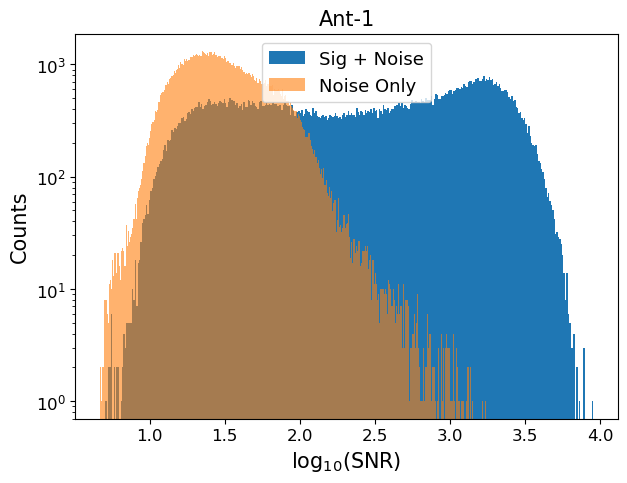

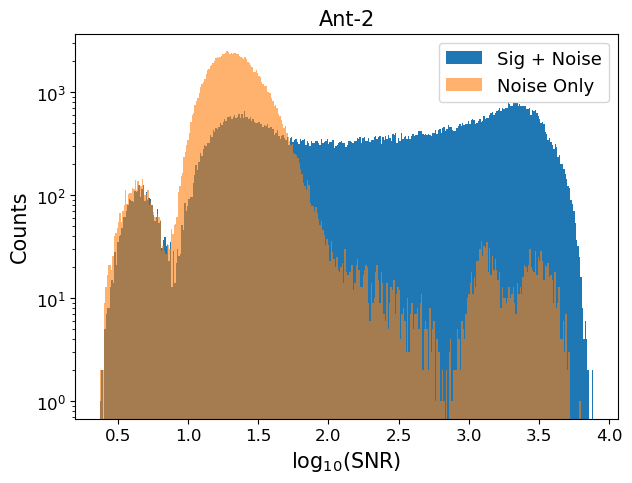

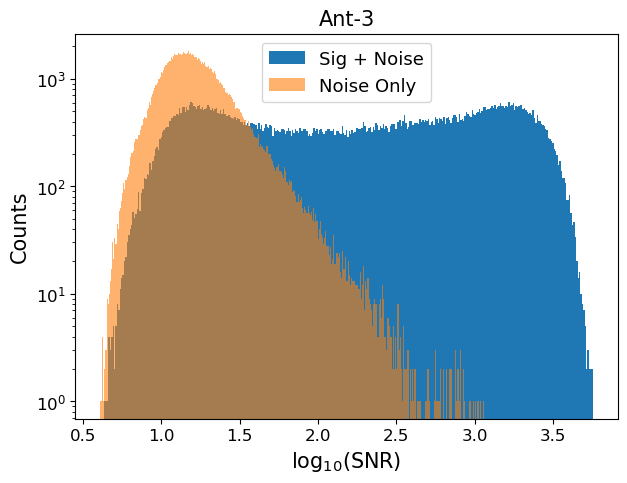

In [4]:
for ant in [1, 2, 3]:
    month = "MayJune_Validation/V2"

    ValiDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/{month}/Data"

    # Loading Data
    print("Loading Data")
    sig_noise = np.load(ValiDir + f"/ant{ant}_Noisy.npy")
    noise_only = np.load(ValiDir + f"/ant{ant}_NoiseOnly.npy")

    ## Convert ant traces to channel traces
    ch0_sig, ch1_sig = sig_noise[:,:,0], sig_noise[:,:,1]
    ch0_noise, ch1_noise = noise_only[:,:,0], noise_only[:,:,1]

    ## Calculating SNR values
    print("Calculating SNR")
    snr_sig_ch0 = [GetSNR(tr) for tr in ch0_sig]
    snr_sig_ch1 = [GetSNR(tr) for tr in ch1_sig]

    snr_noise_ch0 = [GetSNR(tr) for tr in ch0_noise]
    snr_noise_ch1 = [GetSNR(tr) for tr in ch1_noise]

    ## Saving SNR values
    print("Saving data")
    np.savez(ValiDir + f"/ant{ant}_SNR", sig_ch0=snr_sig_ch0, sig_ch1=snr_sig_ch1, noise_ch0=snr_noise_ch0, noise_ch1=snr_noise_ch1)

    ## Combining channels SNR
    snr_sig_noise = snr_sig_ch0 + snr_sig_ch1
    snr_noise_only = snr_noise_ch0 + snr_noise_ch1

    ## Plotting SNR
    print("Saving Plot")
    plt.figure(figsize=(7,5))
    plt.hist(np.log10(snr_sig_noise), bins=int(np.sqrt(len(snr_noise_only))),alpha=1, label="Sig + Noise")
    plt.hist(np.log10(snr_noise_only), bins=int(np.sqrt(len(snr_noise_only))),alpha=0.6, label="Noise Only")

    plt.title(f"Ant-{ant}", fontsize=15)
    plt.xlabel(r"log$_{10}$(SNR)", fontsize=15)
    plt.ylabel("Counts", fontsize=15)

    plt.legend(fontsize=13)
    plt.tick_params(axis='both', labelsize=12)
    plt.yscale('log')

    plt.savefig(ValiDir + f"/ant{ant}_SNR.png", bbox_inches='tight')